Import Packages 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

Data Processing

In [2]:
csv = pd.read_csv("Index2020.csv") 
dataframe =csv.copy()
dataframe.date = pd.to_datetime(dataframe.date, dayfirst = True) #change to timeserires data
dataframe.set_index("date", inplace=True) #setting timeseries data to index
dataframe = dataframe.asfreq('b') #set frequency to business days
dataframe = dataframe.fillna(method='ffill') #front fill missing data

In [3]:
dataframe['market_value'] = dataframe.spx

In [4]:
del dataframe['dax']
del dataframe['spx']
size = int(len(dataframe)*0.8) #split data 80%
df_train, df_test = dataframe.iloc[:size], dataframe.iloc[size:]

White Noise

In [5]:
wn = np.random.normal(loc = dataframe.market_value.mean(), scale = dataframe.market_value.std(), size = len(dataframe))
#method (random.normal)creates random values from a normally distributed mean
#mean and stan deviation set to spx for easy comparison

In [6]:
dataframe['wn'] = wn
#adds new colum to data frame; white noise

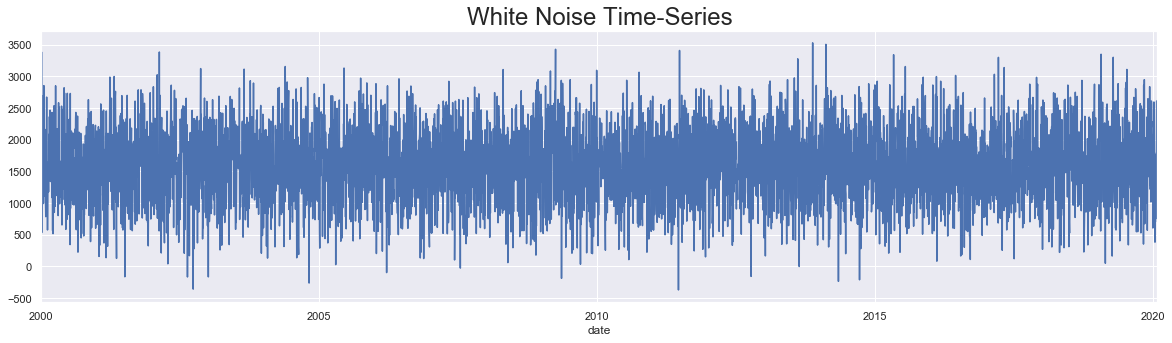

In [7]:
dataframe.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

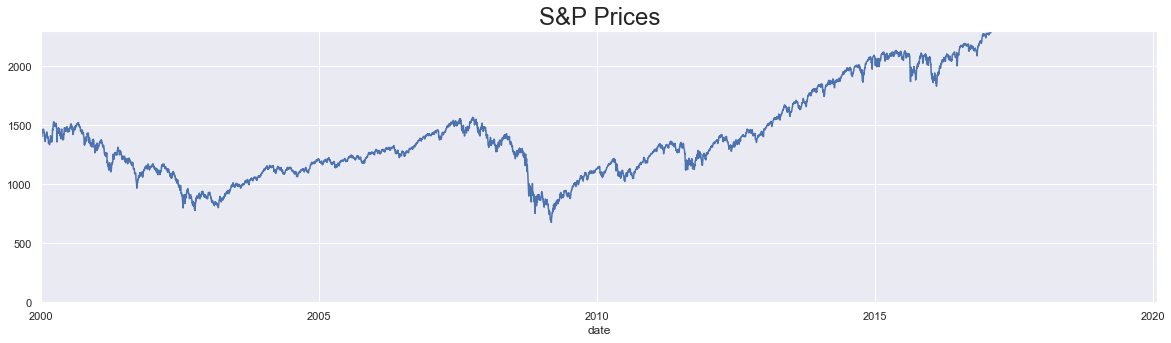

In [8]:
dataframe.market_value.plot(figsize = (20,5))
plt.title("S&P Prices", size= 24)
plt.ylim(0,2300)#setting limits for y-axis; easy to compare the graphs
plt.show()

Stationarity

In [9]:
sts.adfuller(dataframe.market_value)
#test statistic 1st
#expresses the p value associated with the t statistic 2nd
#the no. of lags used in regression when doin t statistic 3rd
#no. of observation used 4th
#critical values from Dickey Fuller table 5/6/7th
#Estimates maximized infor criteria provided auto correlation 8th

(1.4461811946518162,
 0.997314161926446,
 6,
 5233,
 {'1%': -3.431600240898321,
  '5%': -2.862092476697549,
  '10%': -2.567064083085378},
 43607.92476498246)

In [10]:
sts.adfuller(dataframe.wn)
#wn is stationary
#No autocorrelation;no lags
#p value near 0

(-72.15171795708596,
 0.0,
 0,
 5239,
 {'1%': -3.431598808349038,
  '5%': -2.862091843792385,
  '10%': -2.567063746167403},
 81143.11029679087)

Seasonality

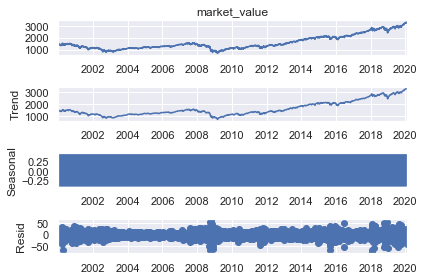

In [11]:
s_dec_additive = seasonal_decompose(dataframe.market_value, model = "additive")
#assumes observed value = trend+seasonal+residual
s_dec_additive.plot() #to analyse result
plt.show()
#trend & observed look same;function uses previous period values as a trend-setter
#no concrete cyclical pattern
#errors of model estimate;the difference between true values and predictions for any periods
#suggests no seasonality

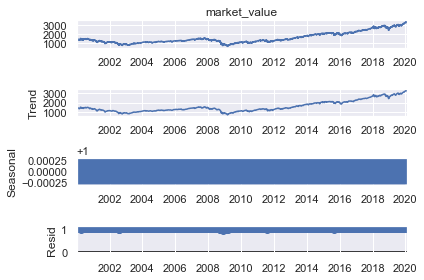

In [12]:
s_dec_multiplicative = seasonal_decompose(dataframe.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()
#similar to first one;no seasonality

ACF

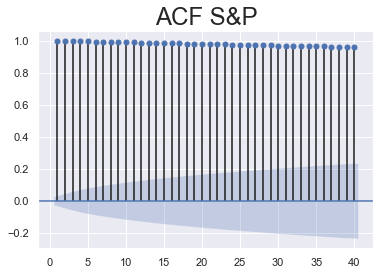

In [13]:
sgt.plot_acf(dataframe.market_value,lags = 40, zero = False) 
#common practice analysis 1st 40lags;last 40 periods before current one
#false ensures we only observe a plot for higher lag values
plt.title("ACF S&P", size = 24)
plt.show()
#y-axis possible values for the autocorrelation(AC) coefficient
#blue area suggest Existence of AC
#lines higher than blue area G;show coefficient are significant
#Indicator of time depedence in the data
#ACF:shows direct & indirect effect
#40 lagged coefficient are significant & declining
#all between 0.9 & 1.0;effects hardly deteriorate over time

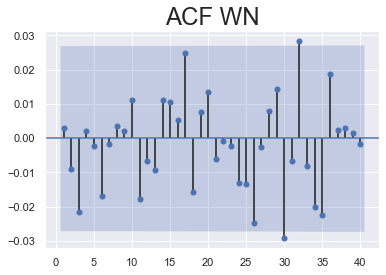

In [14]:
sgt.plot_acf(dataframe.wn,lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()
#+ &- AC;lines outside blue area,Coefficient not significant, NO AC for any lags

PACF

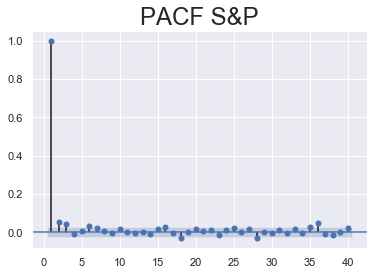

In [15]:
sgt.plot_pacf(dataframe.market_value,lags = 40,zero = False, method = ('ols'))#ols:order of least squares
plt.title("PACF S&P", size = 24)
plt.show()
#Some values; e.g. 9th lag negative;mean higher values 9 periods ago result in lower values today
#PACF:cancels out additional channels a previous period value affecrts the present one
#shows direct effect

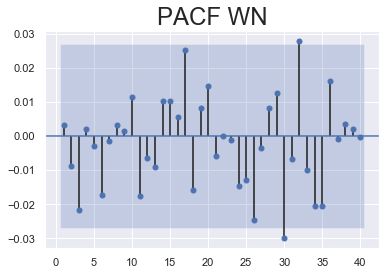

In [16]:
sgt.plot_pacf(dataframe.wn,lags = 40,zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()
#no AC